In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline

In [3]:
df =pd.read_csv("cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


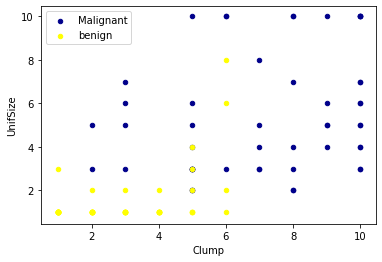

In [5]:
ax = df[df['Class']==4][0:50].plot(kind = 'scatter', x='Clump', y='UnifSize', color ='DarkBlue', label ='Malignant');
df[df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [6]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [7]:
df = df[pd.to_numeric(df['BareNuc'], errors = 'coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [9]:
X = np.asanyarray(df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']])
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [11]:
df['Class'] = df['Class'].astype('int')
y = np.asanyarray(df[['Class']])
y[0:5]

array([[2],
       [2],
       [2],
       [2],
       [2]])

In [12]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)
print("Train set = ", X_train.shape, y_train.shape)
print("Test set = ", X_test.shape, y_test.shape)

Train set =  (546, 9) (546, 1)
Test set =  (137, 9) (137, 1)


In [13]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train)

C:\Users\chitr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
y_hat = clf.predict(X_test)
y_hat[0:5]

array([2, 4, 2, 4, 2])

In [17]:
y_test[0:5]

array([[2],
       [4],
       [2],
       [4],
       [2]])

In [20]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat, average = 'weighted')

0.9639038982104676

In [24]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_hat)

0.9635036496350365